In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv', low_memory=False)
pd.options.display.max_columns = 100
df

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,16429,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,https://www.wikidata.org/wiki/Q3806459,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",American,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484951,55.621.134,False,False,False,900605,NaN,Drawings and Prints,1955,Print,Holiday Card,NaN,NaN,NaN,NaN,NaN,22488,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,1985,NaN,NaN,NaN,1944,1939,1949,Engraving,Block: 3 15/16 × 2 1/2 in. (10 × 6.4 cm)\r\nSh...,"Gift of the Estate of John Taylor Arms, 1955",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484952,1977.646,False,False,False,900606,NaN,Drawings and Prints,1977,Print,Brooklyn Local,NaN,NaN,NaN,NaN,NaN,22488,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,19

We can see from the head of the data that there will likely be missing values, making it difficult ot make a reasonable and reliable visualization. To address this, we'll thoroughly clean the data for this EDA.

The first step is to understand what we have in the dataset for variables. The .shape() method returns the dimensions of the dataset while .nunique() will return the amount of unique variables within each column. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

In [3]:
df.nunique()

Object Number              481656
Is Highlight                    2
Is Timeline Work                2
Is Public Domain                2
Object ID                  484956
Gallery Number                379
Department                     19
AccessionYear                 180
Object Name                 28631
Title                      245800
Culture                      7313
Period                       1891
Dynasty                       405
Reign                         396
Portfolio                    3959
Constituent ID              48365
Artist Role                  7118
Artist Prefix                8154
Artist Display Name         66949
Artist Display Bio          54658
Artist Suffix                2751
Artist Alpha Sort           66887
Artist Nationality           6945
Artist Begin Date           31231
Artist End Date             30864
Artist Gender                 290
Artist ULAN URL             38477
Artist Wikidata URL         40972
Object Date                 33197
Object Begin D

In [4]:
df['Medium'].nunique()

65907

In [5]:
df['Medium'].value_counts

<bound method IndexOpsMixin.value_counts of 0              Gold
1              Gold
2              Gold
3              Gold
4              Gold
            ...    
484951    Engraving
484952      Etching
484953      Etching
484954          NaN
484955      Etching
Name: Medium, Length: 484956, dtype: object>

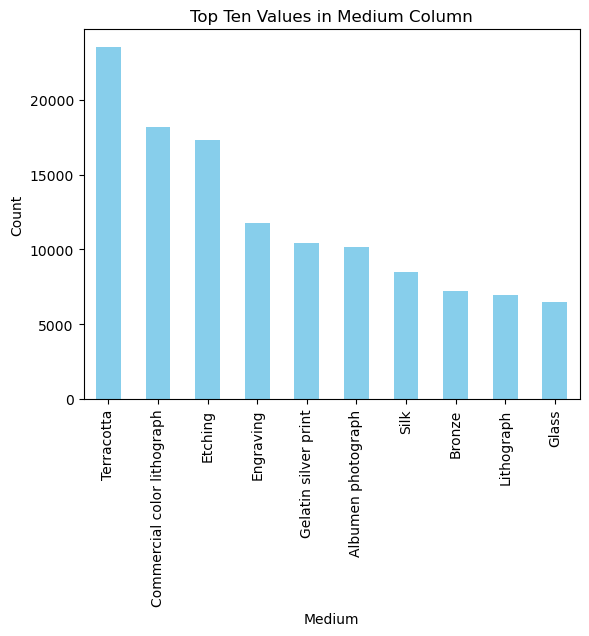

In [6]:
# Get value counts for the 'Medium' column
medium_counts = df['Medium'].value_counts()

# Select the top ten values
top_ten_values = medium_counts.head(10)

# Plotting the histogram
top_ten_values.plot(kind='bar', color='skyblue')
plt.title('Top Ten Values in Medium Column')
plt.xlabel('Medium')
plt.ylabel('Count')
plt.show()

# Dimension Reduction

What we see is that this is a high-dimensional space where each column has thousands of unique datapoints. Without properly cleaning and organizing this data, it is difficult to make any useful insights. 

To get started with Dimension Reduction, we'll get rid of columns with missing data by using the .dropna method, setting the threshold to 45,000, thus dropping any column with more than 45,000 missing values. Also drop columns with only 1 unique value. 

In [7]:
df.shape

(484956, 54)

In [8]:
df = df.dropna(axis=1, thresh=45000)
df.isnull().sum(axis=0)
df.drop(columns=['Link Resource'])

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Object Wikidata URL,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,NaN,16429,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,https://www.wikidata.org/wiki/Q3806459,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,107,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",American,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484951,55.621.134,False,False,False,900605,NaN,Drawings and Prints,1955,Print,Holiday Card,NaN,NaN,22488,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,1985,NaN,NaN,NaN,1944,1939,1949,Engraving,Block: 3 15/16 × 2 1/2 in. (10 × 6.4 cm)\r\nSh...,"Gift of the Estate of John Taylor Arms, 1955",NaN,NaN,Prints,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484952,1977.646,False,False,False,900606,NaN,Drawings and Prints,1977,Print,Brooklyn Local,NaN,NaN,22488,Artist,,Douglas Gorsline,"American, Rochester, New York 1913–1985 Dijon,...",,"Gorsline, Douglas",American,1913,1985,NaN,NaN,NaN,1944,1939,1949,Etching,Plate: 8 1/4 × 6 7/8 in. (20.9 × 17.5 cm)\r\nS...,"John B. Turner Fund, 1977",NaN,NaN,Prints,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484953,33.40.1,False,False,False,900633,NaN,Drawings and Prints,1933,Print,Yesterday and Today,NaN,NaN,9738,Artist,,Edmond Mario Granville,"American, Chicago 1905–1969",,"Granville, Edmond Mario",American,1905,1969,NaN,NaN,NaN,ca. 1925–33,1920,1938,Etching,Plate: 8 3/4 × 5 7/8 in. (22.2 × 15 cm)\r\nShe...,"Gift of E. Mario Granville, 1933",NaN,NaN,Prints,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
484954,170.1 C42,True,False,False,900717,NaN,The Libraries,NaN,NaN,"De la loi du contraste simultané des couleurs,...",NaN,NaN,19552,Author,,Michel Eugène Chevreul,1786-1889,,"Chevreul, Michel Eugène",,1786,1889,NaN,(not assigned),https:/

# Feature Engineering

From here, we are able to start cutting the data into different segments, making it more useful for story telling purposes. 

In [9]:
df.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Constituent ID',
       'Artist Role', 'Artist Prefix', 'Artist Display Name',
       'Artist Display Bio', 'Artist Suffix', 'Artist Alpha Sort',
       'Artist Nationality', 'Artist Begin Date', 'Artist End Date',
       'Artist Gender', 'Artist ULAN URL', 'Artist Wikidata URL',
       'Object Date', 'Object Begin Date', 'Object End Date', 'Medium',
       'Dimensions', 'Credit Line', 'Geography Type', 'Country',
       'Classification', 'Link Resource', 'Object Wikidata URL', 'Repository',
       'Tags', 'Tags AAT URL', 'Tags Wikidata URL'],
      dtype='object')

One way to explore this data is by examing distributions. Below are distributions of the collection by Period, Culture, Artist Gender, and Country.

In [14]:
selected_columns = ['Period', 'Culture', 'Artist Gender', 'Country', 'Classification', 'Medium']

# Filter DataFrame by selected columns
eda_df = df[selected_columns]

# Display basic information about the selected DataFrame
print(eda_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Period          91143 non-null   object
 1   Culture         208190 non-null  object
 2   Artist Gender   106482 non-null  object
 3   Country         76007 non-null   object
 4   Classification  406239 non-null  object
 5   Medium          477741 non-null  object
dtypes: object(6)
memory usage: 22.2+ MB
None


# Understand the Data

Before we visualize our selected columns, we want to inspect the data therein to understand it's datatype but also information useful to determining how we will visualize the data.

## Period

In [22]:
period_unique_values = eda_df['Period'].nunique()
print("Unique Values ", period_unique_values)
print('Period Column Datatype: ', eda_df['Period'].dtype)
unique_period_values = eda_df['Period'].unique()
unique_period_values 

Unique Values  1891
Period Column Datatype:  object


array([nan, 'Edo period (1615–1868)', 'Qing dynasty (1644–1911)', ...,
       'Early Cypriot III–Middle Cypriot',
       'Late Edo (1615–1868)–early Meiji (1868–1912) period',
       'Southern Song (1127–1279) to Yuan dynasty (1271–1368)'],
      dtype=object)

## Culture

In [24]:
culture_num_unique_values = eda_df['Culture'].nunique()
print("Unique Values ", culture_num_unique_values)
print('Culture Column Datatype: ', eda_df['Culture'].dtype)
unique_culture_values = eda_df['Culture'].unique()
unique_culture_values

Unique Values  7313
Culture Column Datatype:  object


array([nan, 'Mexican', 'Guatemalan', ..., 'English, French',
       'English, probably London', 'Mexican or Argentinian'], dtype=object)

## Country

In [25]:
country_num_unique_values = eda_df['Country'].nunique()
print("Unique Values ", country_num_unique_values)
print('Country Column Datatype: ', eda_df['Country'].dtype)
unique_country_values = eda_df['Country'].unique()
unique_country_values

Unique Values  967
Country Column Datatype:  object


array([nan, 'Mexico', 'Guatemala', 'United States', 'England', 'Spain',
       'United States|England', 'Netherlands',
       'United States|United States', 'France', 'Canada',
       'United States|France', 'England|France', 'China', 'Italy',
       'Germany', 'Japan', 'Netherlands|Netherlands', 'Czech Republic',
       'England|Ireland', 'Ireland|United States', 'Venezuela',
       'England|Netherlands', 'England|Belgium', 'France|Italy',
       'Bermuda', 'Ireland', 'India', 'England|United States',
       'United States|United States|United States',
       'France|NEW ZEALAND ROTORUA WHAKAREWAREWA',
       'China|NEW ZEALAND ROTORUA WHAKAREWAREWA', 'Germany|Italy',
       'Lisez et propagez nos Annales: "L\'Immacul‚e"',
       'France|Bernard Turner', 'France|Harold Copping',
       'Czech Republic|England', 'Belgium|France',
       'Belgium|England|France', 'United States|Germany',
       'United Kingdom', 'France|Germany', 'Scotland',
       'Germany|Czech Republic', 'Holland', '

## Classification

In [26]:
class_num_unique_values = eda_df['Classification'].nunique()
print("Unique Values ", class_num_unique_values)
print('Classification Column Datatype: ', eda_df['Classification'].dtype)
unique_class_values = eda_df['Classification'].unique()
unique_class_values

Unique Values  1244
Classification Column Datatype:  object


array([nan, 'Metalwork-Brass', 'Metalwork-Pewter', ...,
       'Prints|Enamels-Translucent',
       'Ornament & Architecture|Textiles-Embroidered',
       'Ephemera|Ornament & Architecture'], dtype=object)

## Medium

In [ ]:
medium_num_unique_values = eda_df['Medium'].nunique()
print("Unique Values ", medium_num_unique_values)
print('Medium Column Datatype: ', eda_df['Medium'].dtype)
unique_medium_values = eda_df['Medium'].unique()
unique_medium_values

In [ ]:
# # Visualize the distribution of 'Is Public Domain'
# sns.countplot(x='Is Public Domain', data=eda_df)
# plt.title('Distribution of Is Public Domain')
# plt.show()

# # Visualize the distribution of 'Department'
# plt.figure(figsize=(12, 6))
# sns.countplot(x='Department', data=eda_df, order=eda_df['Department'].value_counts().index)
# plt.title('Distribution of Departments')
# plt.xticks(rotation=90)
# plt.show()

# # Calculate the threshold for the top 5% of data
# threshold = int(eda_df.shape[0] * 0.05)

# # Get the top 5% countries based on the count
# top_countries = eda_df['Country'].value_counts().head(threshold).index

# # Filter DataFrame to include only the top 5% of countries
# eda_df_top5 = eda_df[eda_df['Country'].isin(top_countries)]

# # Visualize the distribution of Pieces by country for the top 5%
# plt.figure(figsize=(12, 6))
# sns.countplot(x='Country', data=eda_df_top5, order=eda_df_top5['Country'].value_counts().index)
# plt.title('Distribution by Country (Top 5%)')
# plt.xticks(rotation=90)
# plt.show()